In [75]:
import cvxpy as cp
import matplotlib.pyplot as plt
import numpy as np

In [76]:
from data import *

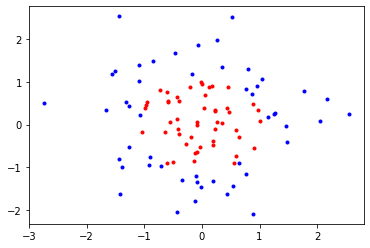

In [77]:
X = np.random.multivariate_normal([0,0], [[1,0],[0,1]], 100)
# print(np.argpartition(X[:, 0]**2+X[:, 1]**2, 99))
X = X[np.argsort(X[:, 0]**2+X[:, 1]**2), :]
Y = X[50:, :].T
X = X[:50, :].T

plt.plot(X[0,:], X[1,:], 'r.')
plt.plot(Y[0,:], Y[1,:], 'b.')
plt.show()

In [78]:
lambd = cp.Variable(shape=(100,))
gamma = cp.Variable(shape=(100,))

# X2 = X[[0, 45], :]
# Y2 = Y[[0, 45], :]
def square(col):
    return np.array([1, (2**0.5)*col[0], (2**0.5)*col[1], (2**0.5)*col[0]*col[1], col[0]**2, col[1]**2])

M = np.concatenate((X, -Y), axis=1)
M2 = np.apply_along_axis(square, 0, M)
D = (M2.T @ M2) + np.eye(M2.shape[1]) * 1e-5



# M2 = np.apply_along_axis(square, 0, M)

In [79]:
M2.shape

(6, 100)

In [80]:
print(D.shape)
print(M.shape)
print(np.all(np.linalg.eigvals(D) >= 0))
print(np.linalg.eigvals(D))

(100, 100)
(2, 100)
True
[3.66018614e+02+0.00000000e+00j 2.03374390e+02+0.00000000e+00j
 1.82836472e+02+0.00000000e+00j 1.54755698e+02+0.00000000e+00j
 3.75192112e+01+0.00000000e+00j 9.54006352e+01+0.00000000e+00j
 1.00000000e-05+0.00000000e+00j 1.00000000e-05+0.00000000e+00j
 9.99999999e-06+3.10221826e-15j 9.99999999e-06-3.10221826e-15j
 1.00000000e-05+9.90423028e-16j 1.00000000e-05-9.90423028e-16j
 1.00000000e-05+4.80988831e-15j 1.00000000e-05-4.80988831e-15j
 1.00000000e-05+0.00000000e+00j 9.99999999e-06+2.29153592e-15j
 9.99999999e-06-2.29153592e-15j 9.99999999e-06+1.01066676e-16j
 9.99999999e-06-1.01066676e-16j 9.99999999e-06+3.02450359e-15j
 9.99999999e-06-3.02450359e-15j 9.99999999e-06+1.95773243e-15j
 9.99999999e-06-1.95773243e-15j 1.00000000e-05+4.18532237e-15j
 1.00000000e-05-4.18532237e-15j 9.99999999e-06+0.00000000e+00j
 1.00000000e-05+0.00000000e+00j 1.00000000e-05+1.14938073e-15j
 1.00000000e-05-1.14938073e-15j 1.00000000e-05+0.00000000e+00j
 1.00000000e-05+3.63302379e-15

In [81]:
k = 2
C = 0.1
objective = cp.Minimize( -cp.sum(lambd) + 0.5*cp.quad_form(lambd, D) + (lambd[0]+gamma[0])**(k/(k-1))/(k * C)**(k/(k-1)) * (1-1/k))

constraints= [lambd >= 0, cp.sum(lambd[0:50] - lambd[50:100]) == 0, lambd <= (lambd[0]+gamma[0]), lambd+gamma==C*np.ones(100)]
problem = cp.Problem(objective, constraints)
problem.solve(solver=cp.ECOS, verbose=False)

-0.287151611711862

In [82]:
lambd.value

array([ 9.99999999e-02,  9.99999999e-02,  9.99999999e-02,  9.99999999e-02,
        1.33730763e-10,  3.32536704e-03,  1.41517373e-10,  9.46030973e-11,
        9.49915304e-11,  3.60996452e-11,  7.46828912e-11,  3.12868956e-11,
        2.84635270e-11,  2.74710946e-11,  3.08100902e-11,  2.05532083e-11,
        1.70597500e-11,  2.42992655e-11,  2.16693774e-11,  1.97987889e-11,
        1.42425282e-11,  1.00374418e-11,  1.22197654e-11,  1.15240947e-11,
        1.24833897e-11,  1.22924101e-11,  8.36376105e-12,  7.34291097e-12,
        7.15893641e-12,  6.35433890e-12,  6.37498692e-12,  6.10839345e-12,
        5.74743461e-12,  5.33256932e-12,  5.62589030e-12,  4.60941808e-12,
        4.77582941e-12,  4.74305834e-12,  3.98190660e-12,  4.44901672e-12,
        4.36351934e-12,  4.13948581e-12,  4.16428323e-12,  3.03322403e-12,
        4.03235723e-12,  3.18870614e-12,  3.11564626e-12,  3.18691475e-12,
        3.30600093e-12,  3.06445616e-12,  1.00000000e-01,  1.00000000e-01,
        9.99999997e-02,  

In [83]:
gamma.value + lambd.value

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [84]:
w = np.sum(np.multiply(lambd.value,M2), axis=1)

In [85]:
print(w.shape)
print(M[:, 23].shape)

(6,)
(2,)


[0.81024569 0.81166279 0.81735316 0.82049533 0.84146543 0.8330588
 0.84098948 0.84521611 0.84513924 0.86559065 0.84856261 0.87058879
 0.87430574 0.87577949 0.87117993 0.8899458  0.90128846 0.88127379
 0.88702298 0.89210045 0.9142748  0.94620644 0.92706088 0.93235734
 0.92505303 0.92660044 0.96682341 0.98359048 0.98703967 1.0040877
 1.00344634 1.00995451 1.01941725 1.03167201 1.0231899  1.05737733
 1.05069778 1.05194358 1.08483256 1.06400185 1.06741142 1.07749287
 1.07640701 1.14137723 1.08279592 1.13078256 1.13573124 1.13028583
 1.1229289  1.1392808  1.10774644 1.12564437 1.16337854 1.16694154
 1.20862784 1.16694151 1.16694146 1.1767816  1.1669415  1.28533466
 1.29801679 1.29771636 1.26178695 1.25122179 1.25496919 1.25843763
 1.27110822 1.29536997 1.30688825 1.31202362 1.31739095 1.33776017
 1.42099019 1.34598604 1.42664376 1.46360915 1.4426781  1.40766796
 1.51649285 1.51576985 1.54859309 1.57082322 1.53031374 1.55481885
 1.57789841 1.61768407 1.68560069 1.87737559 1.76004676 1.756984

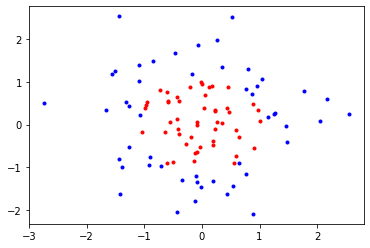

In [86]:
# i1 = 0
# i2 = 2
# plt.plot(X[i1,:], X[i2,:], 'r.')
# plt.plot(Y[i1,:], Y[i2,:], 'b.')
# x = np.linspace(-10, 0, 100)
# y = -(w[i1, 0]*x + b)/w[i2, 0]
# plt.plot(x, y)
# plt.show()
i1 = 0
i2 = 1
plt.plot(X[i1,:], X[i2,:], 'r.')
plt.plot(Y[i1,:], Y[i2,:], 'b.')
# x = np.linspace(-30, 30, 100)
# y = -(w[i1,0]*x + b)/w[i2,0]
print(w.T@M2)
index = np.argpartition(lambd.value, 7)[0]
b = 1 - (w.T@M2[:,index])
print(b)
inds = np.where(w.T@M2 + b>0)
y_preds = np.zeros(100)
y_preds[inds] += 1
# print(y)
# plt.plot(x, y)
# plt.grid()
# plt.xticks(np.arange(-30, 60, 5))
# plt.yticks(np.arange(-30, 60, 5))
# plt.show()

In [87]:
y_preds

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [88]:
# print((w[i1,0]*X2[i1,:] + w[i2,0]*X2[i2,:] + b))#/np.linalg.norm(w))
# print((w[i1,0]*Y2[i1,:] + w[i2,0]*Y2[i2,:] + b))#/np.linalg.norm(w))

In [89]:
print(1/np.linalg.norm(w))

1.1258024290335744
